___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Categorical Data Plots

Seaborn can also plot categorical data. Here are a few main plot types for this:

* `factorplot`
* `boxplot`
* `violinplot`
* `stripplot`
* `swarmplot`
* `barplot`
* `countplot`


In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## I. barplot and countplot

These are very similar plots that allow you to get aggregate data off a categorical feature in your data. 

**barplot** is a general plot that _allows you to aggregate the categorical data based off some function_, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

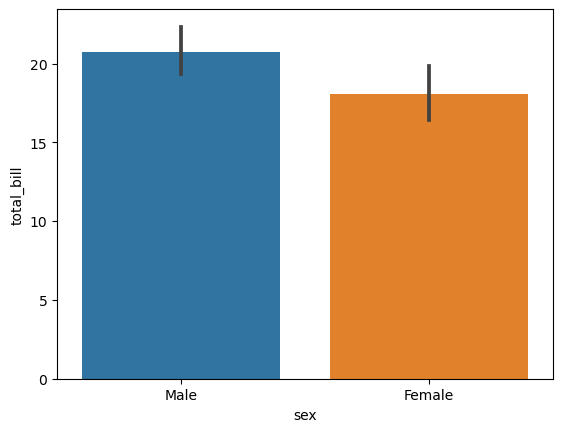

In [3]:
# MEAN (default)
sns.barplot(x='sex',y='total_bill',data=tips)

In [4]:
import numpy as np

You can change the estimator object to your own function (that converts a vector to a scalar)

<Axes: xlabel='sex', ylabel='total_bill'>

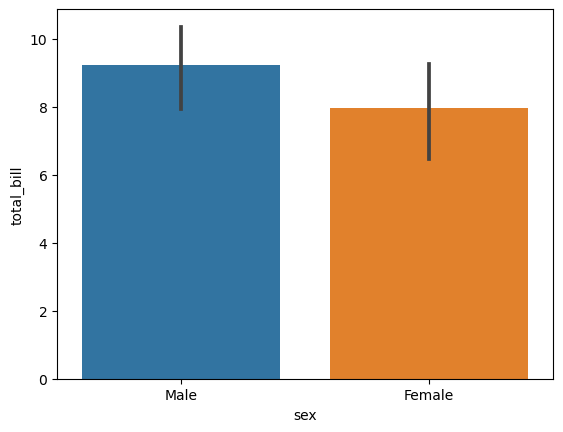

In [5]:
# Standard Deviation
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### i. countplot

Same as `barplot` except the _estimator is explicitly counting the number of occurrences_. Therefore only pass the x value

<Axes: xlabel='sex', ylabel='count'>

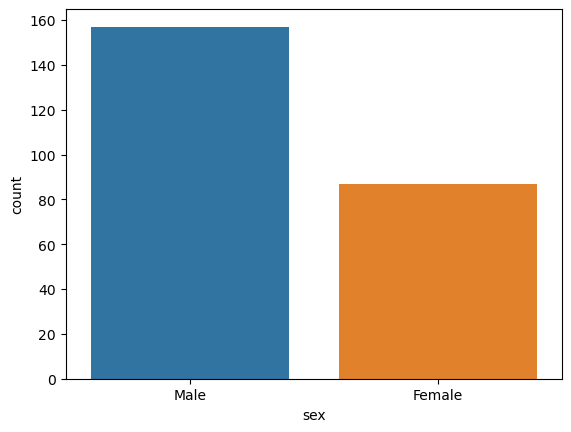

In [6]:
sns.countplot(x='sex',data=tips)

## II. boxplot and violinplot

`boxplots` and `violinplots` are used to _show the distribution of categorical data_. A `box plot` (aka box-and-whisker plot) shows the _distribution of quantitative data as to compare between variables_. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<Axes: xlabel='day', ylabel='total_bill'>

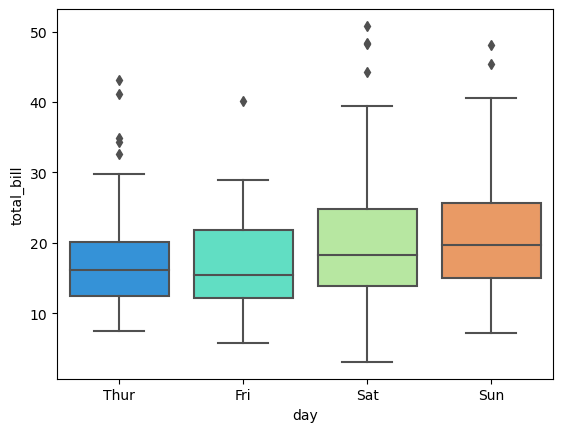

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<Axes: >

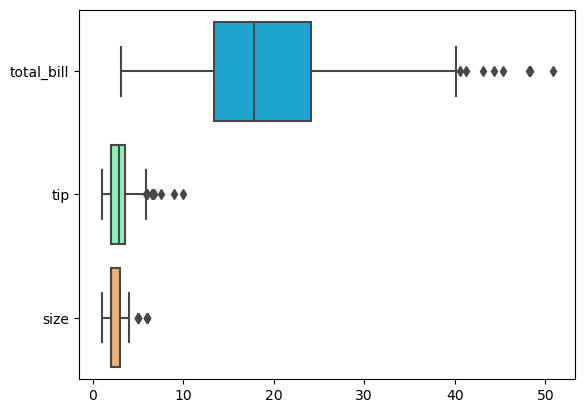

In [8]:
# Change orientation of boxplot
sns.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

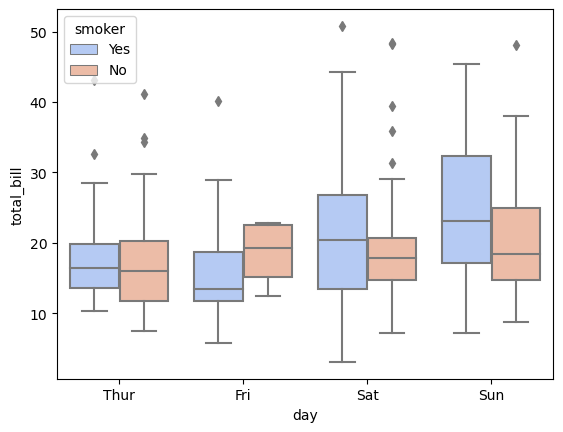

In [9]:
# Use HUE param to get another lvl of data/detail
#      - i.e. total bill of each day, and split again for total bill whether a smoker
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

Interesting observation, smokers tend to have a higher bill on the weekends. Maybe weekend is time to sit back unwind with smokes and feast? Maybe depending on what they smoke, bill can get higher? Smokes and drinks combo?

### i. violinplot
A _violin plot_ plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the _**violin plot** features a kernel density estimation of the underlying distribution_.

<Axes: xlabel='day', ylabel='total_bill'>

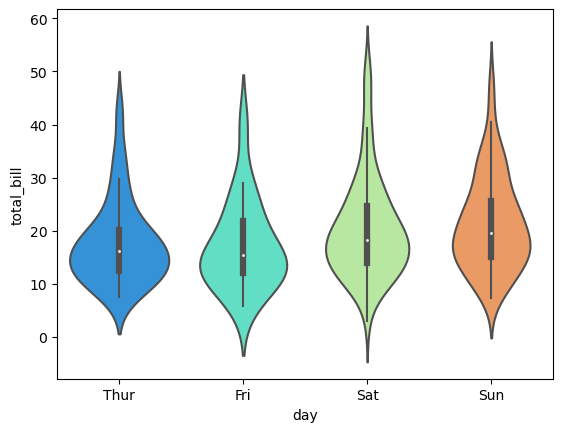

In [10]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

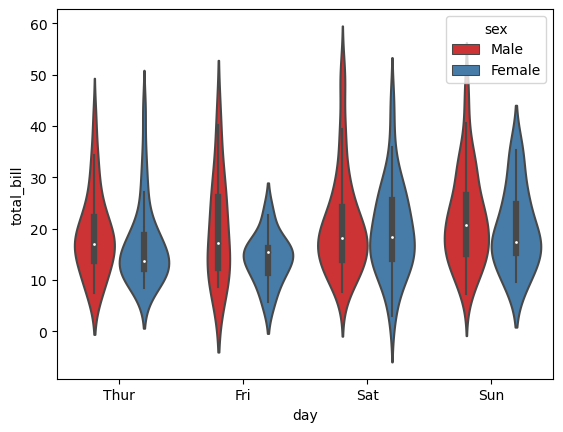

In [11]:
# Using HUE param for another lvl of data
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

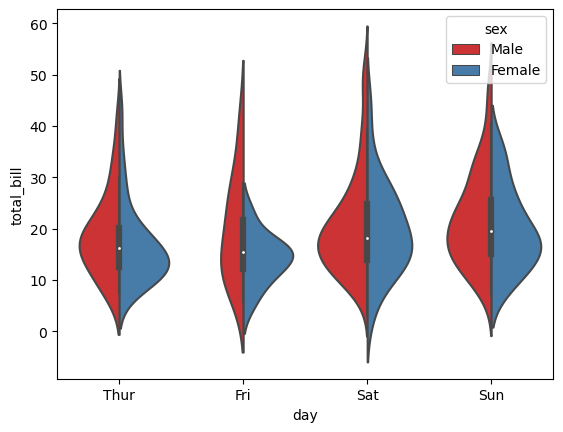

In [12]:
# Condensing the plots/split distros
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

I perfer these kinda plots, you get much more infermation out of it, cleaner and prettier design. A con being it may take some time to digest all the data. 

## III. stripplot and swarmplot
The `stripplot` will _draw a scatterplot where **one variable** is categorical_. A strip plot can be independent, but it also pairs well with a box or violin plot to show all observations plus the underlying distribution.

The swarmplot is similar to `stripplot()`, but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

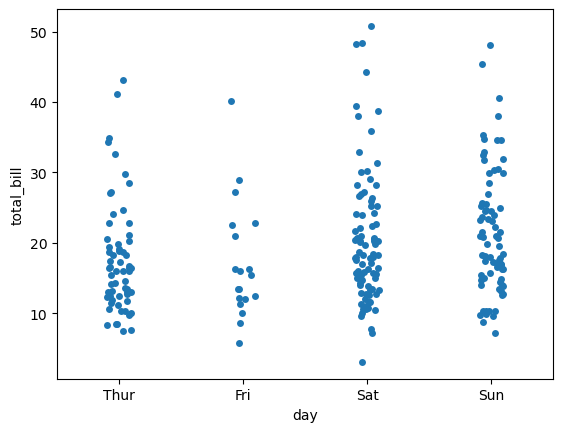

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

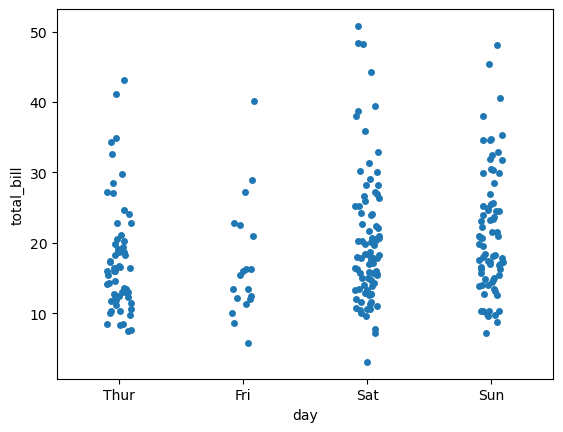

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

<Axes: xlabel='day', ylabel='total_bill'>

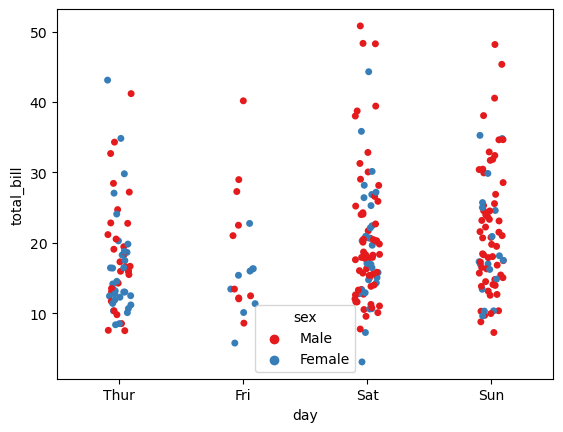

In [17]:
# Adding anohter layer of data with HUE
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

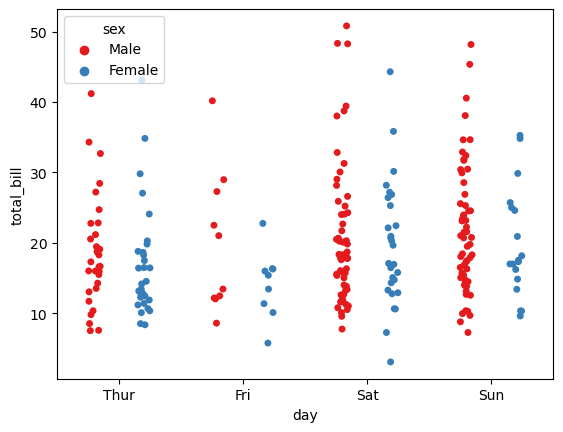

In [19]:
# Split that additional layer up w/ DoDGE
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1', dodge=True)

A swarmplot is like the combo of stripplot and violin plots, where the stripplot shows distributions like a violin

<Axes: xlabel='day', ylabel='total_bill'>

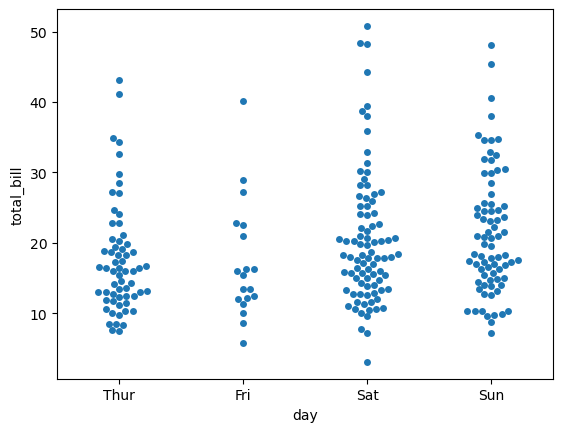

In [20]:
sns.swarmplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

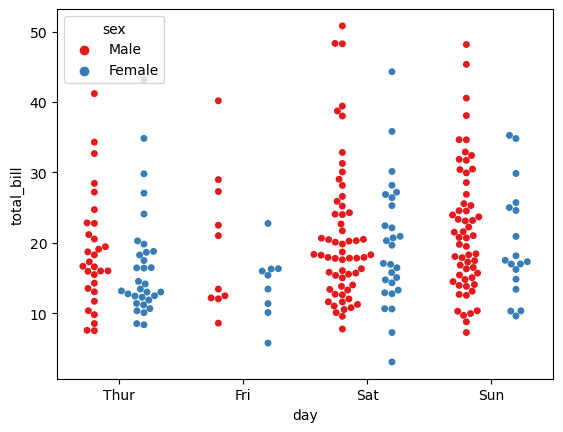

In [23]:
# Splitting on sex with DODGE
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

### i. Combining Categorical Plots

We can also combine categorical plots. Given how similar violin and swarm plots are, lets combine them...

<Axes: xlabel='tip', ylabel='day'>

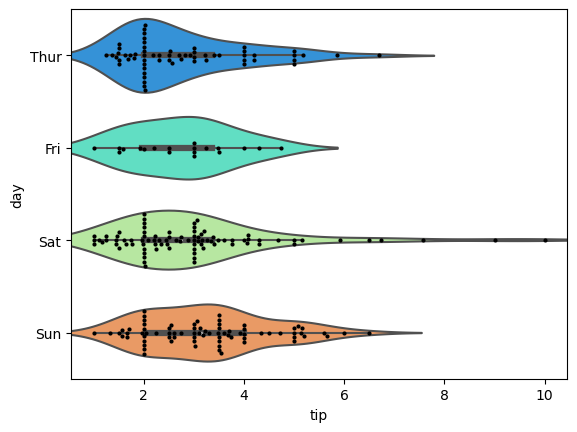

In [24]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## iv. catplot

`catplot` is the _most general form of a categorical plot_. It can take in a **kind** parameter to adjust the plot type. NOT a favorable method, as I perfer calling the actual plots, but it is available

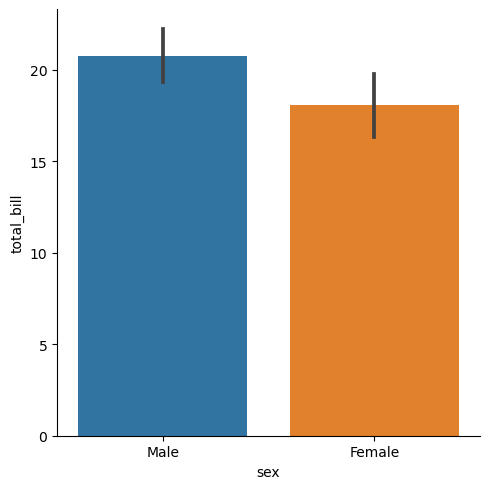

In [26]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')